In [2]:
from dataloader import *
import numpy as np

import torch 
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary

import matplotlib.pyplot as plt
import time
import copy

from Resnet import *
from sklearn.metrics import confusion_matrix
import tqdm

In [108]:
batch_size = 32
image_size = 256

# train transformations
train_trans = transforms.Compose([transforms.ToPILImage(),
                                  transforms.RandomRotation((-360, 360)),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.RandomVerticalFlip(),
                                  transforms.ToTensor()
                                 ])

# validation transformations
test_trans = transforms.Compose([transforms.ToPILImage(),
                                  transforms.ToTensor(),
                                 ])

train = RetinopathyLoader("./data/", "train", transform=None, preprocessing=False)
test = RetinopathyLoader("./data/", "test", transform=test_trans, preprocessing=False)

# Create training and validation dataloaders
train_loader = DataLoader(
    dataset=train, 
    batch_size=batch_size,
    num_workers = 4
)

# [C, H, W] == [3, 512, 512]
test_loader = DataLoader(
    dataset=test,
    batch_size=batch_size,
    num_workers = 4
)


> Found 28099 images...
> Found 7025 images...


/home/ubuntu/DLP/Lab3/dataloader.py:146: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370141920/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  image = torch.tensor(image)
/home/ubuntu/DLP/Lab3/dataloader.py:146: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered i

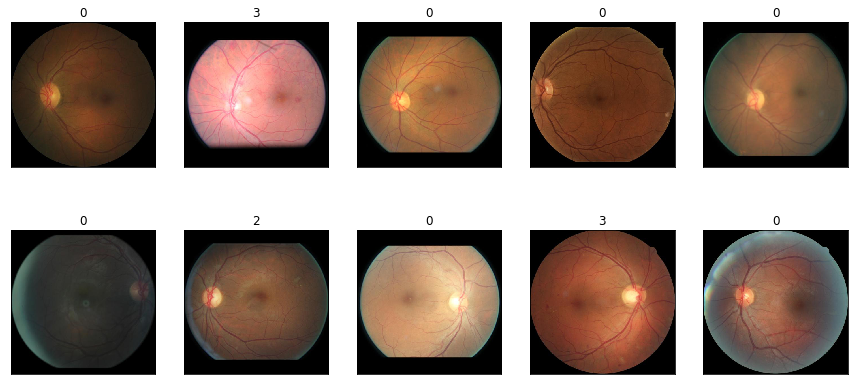

In [55]:
image = []
label = []
for x, y in train_loader:
    fig = plt.figure(figsize = (15, 7))
    for i in range(len(y)):
        ax = fig.add_subplot(2, len(y)/2, i + 1, xticks = [], yticks = [])     
        plt.imshow(x[i].numpy().transpose(1, 2, 0))
        ax.set_title(y.numpy()[i])
    image.append(x.detach().numpy())
    label.append(y.detach().numpy())
    break
    
image=image[0]
label=label[0]

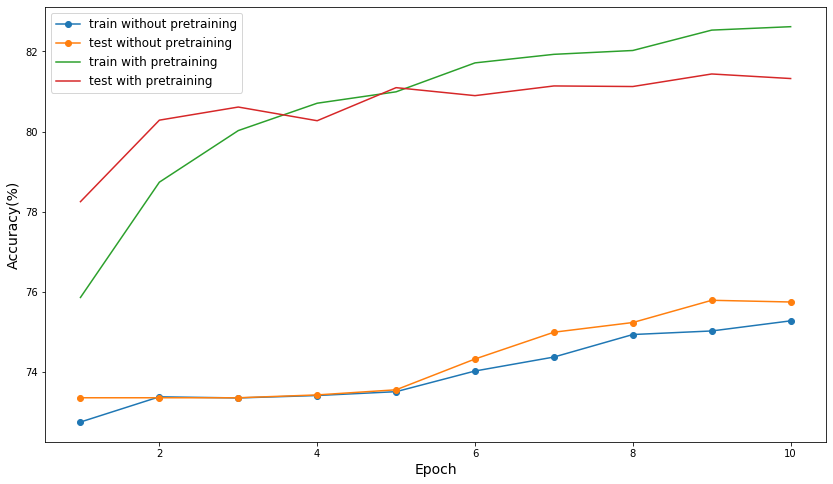

In [11]:
plt.figure(figsize=(14, 8))

load = True
if load:
    acc_non = np.load('acc_50_nonpretrained.npz')
    train_acc_non = acc_non['train_acc']
    test_acc_non = acc_non['test_acc']
    acc_with = np.load('acc_50_pretrained_81_6.npz')
    train_acc_with = acc_with['train_acc']
    test_acc_with = acc_with['test_acc']

# print(test_acc)

# plt.title("Activation Function comparision(EEGNet)", fontsize=18)
plt.ylabel("Accuracy(%)", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
x = np.arange(1, len(train_acc_non)+1)
plt.plot(x, train_acc_non,"-o", label="train without pretraining")
plt.plot(x, test_acc_non,"-o", label="test without pretraining")
plt.plot(x, train_acc_with[:len(train_acc_non)], label="train with pretraining")
plt.plot(x, test_acc_with[:len(train_acc_non)], label="test with pretraining")
plt.legend(fontsize=12)
plt.show()

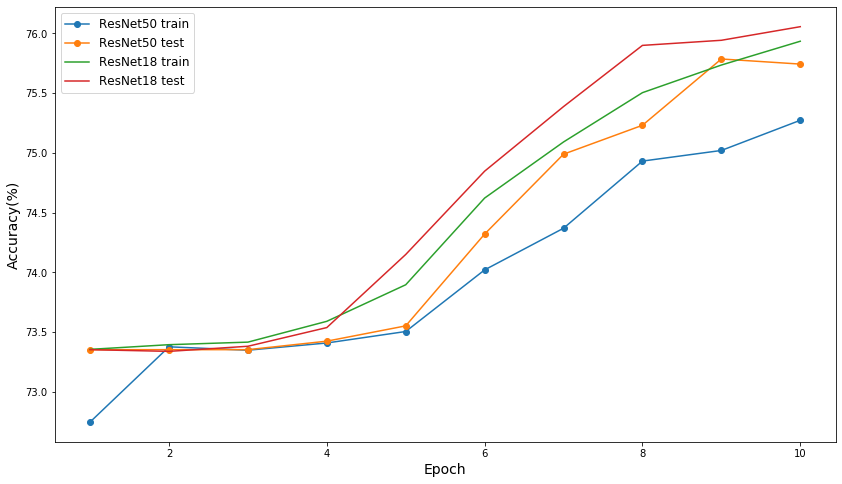

In [12]:
plt.figure(figsize=(14, 8))

load = True
if load:
    acc_non = np.load('acc_50_nonpretrained.npz')
    train_acc_non = acc_non['train_acc']
    test_acc_non = acc_non['test_acc']
    acc_with = np.load('acc_18_nonpretrained.npz')
    train_acc_with = acc_with['train_acc']
    test_acc_with = acc_with['test_acc']

# print(test_acc)

# plt.title("Activation Function comparision(EEGNet)", fontsize=18)
plt.ylabel("Accuracy(%)", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
x = np.arange(1, len(train_acc_non)+1)
plt.plot(x, train_acc_non,"-o", label="ResNet50 train")
plt.plot(x, test_acc_non,"-o", label="ResNet50 test")
plt.plot(x, train_acc_with[:len(train_acc_non)], label="ResNet18 train")
plt.plot(x, test_acc_with[:len(train_acc_non)], label="ResNet18 test")
plt.legend(fontsize=12)
plt.show()

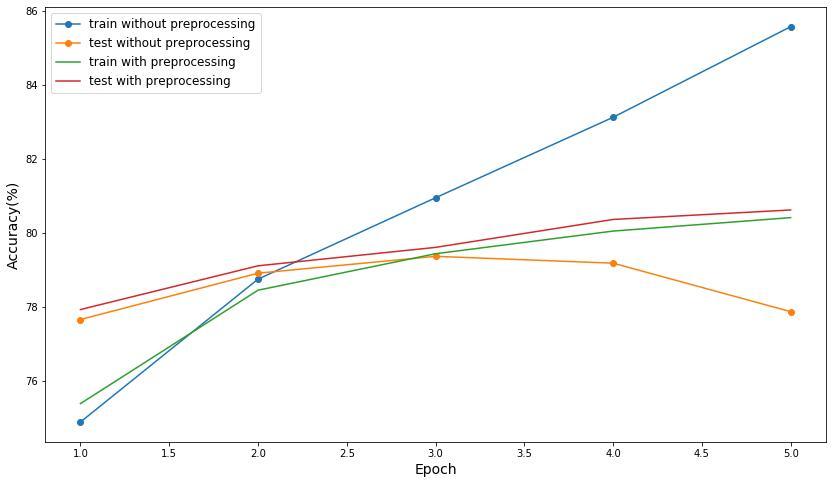

In [15]:
plt.figure(figsize=(14, 8))

load = True
if load:
    acc_non = np.load('acc_18_pretrained_no_preprocessing.npz')
    train_acc_non = acc_non['train_acc']
    test_acc_non = acc_non['test_acc']
    acc_with = np.load('acc_18_pretrained_82.npz')
    train_acc_with = acc_with['train_acc']
    test_acc_with = acc_with['test_acc']

# print(test_acc)

# plt.title("Activation Function comparision(EEGNet)", fontsize=18)
plt.ylabel("Accuracy(%)", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
x = np.arange(1, len(train_acc_non)+1)
plt.plot(x, train_acc_non,"-o", label="train without preprocessing")
plt.plot(x, test_acc_non,"-o", label="test without preprocessing")
plt.plot(x, train_acc_with[:len(train_acc_non)], label="train with preprocessing")
plt.plot(x, test_acc_with[:len(train_acc_non)], label="test with preprocessing")
plt.legend(fontsize=12)
plt.show()

[0.66367854 0.62949096 0.61263171 0.59742762 0.58811003 0.58248238
 0.57631552 0.57363064 0.5719249  0.5705396  0.56777446 0.57151616
 0.56548695 0.56397247 0.56429798 0.56425566 0.56841956 0.56605234]


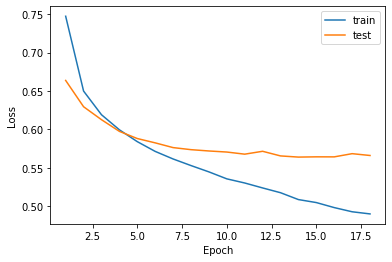

In [4]:
plt.figure()

load = True
if load:
    acc = np.load('acc.npz')
    train_loss = acc['train_loss']
    test_loss = acc['test_loss']

print(test_loss)
# plt.title("Activation Function comparision(EEGNet)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
x = np.arange(1, len(train_loss)+1)
plt.plot(x, train_loss, label="train")
plt.plot(x, test_loss, label="test")
plt.legend()
plt.show()

In [112]:
# model_load = EEGNet().to(device)
# model_load.load_state_dict(torch.load(".\EEGNet_weight.pt"))
device="cuda"
model_load = torch.load('model_18_nonpretrained.pt', map_location=device)
model_load.eval()

y_pred = []   
y_true = []   

test_loss, correct = 0, 0
with torch.no_grad():
    for x, y in tqdm.notebook.tqdm(test_loader):
        x = x.to(device)
        y = y.to(device)
        pred = model_load(x)
    #     test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        y_pred.extend(pred.argmax(1).detach().cpu().numpy())       # 將preds預測結果detach出來，並轉成numpy格式       
        y_true.extend(y.view(-1).detach().cpu().numpy())
    
correct /= len(test_loader.dataset)

print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%")
# print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
# print(model_load)
# summary(model_load, (3, 512, 512))


/home/ubuntu/DLP/Lab3/dataloader.py:146: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370141920/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  image = torch.tensor(image)
/home/ubuntu/DLP/Lab3/dataloader.py:146: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered i


Test Error: 
 Accuracy: 68.8%


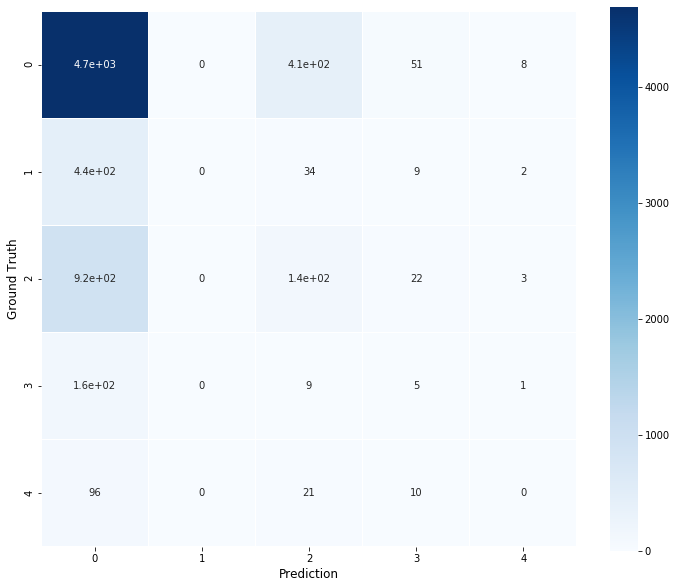

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# np.set_printoptions(threshold=np.nan)
cm = confusion_matrix(y_true, y_pred)
# cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
cm = cm.astype('float')
annot = np.around(cm, 2)

# plot matrix
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel('Prediction', fontsize=12)
ax.set_ylabel('Ground Truth', fontsize=12)
ax.set_aspect('equal')

In [77]:
# path = "./data/2576_right" + '.jpeg'
# image = Image.open(path)
# image = np.asarray(image)
# plt.imshow(image)

def image_show(image, label):
    fig = plt.figure(figsize = (15, 7))
    for i in range(len(label)):
        ax = fig.add_subplot(2, len(label)/2, i + 1, xticks = [], yticks = [])     
        plt.imshow(image[i].transpose(1, 2, 0))
        ax.set_title(label[i])

        
print(image.shape)
image = image.transpose(0, 2, 3, 1)

(10, 3, 512, 512)


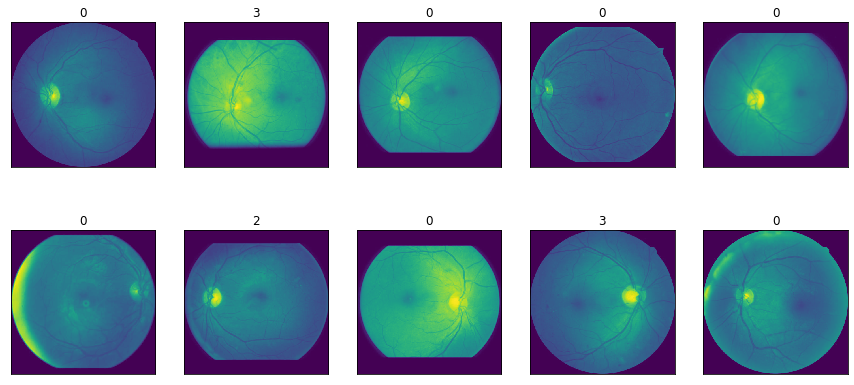

In [67]:
gray_img = []
for img in image:
    gray_img.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
# np.set_printoptions(threshold = np.inf) 
# print(gray_img)

fig = plt.figure(figsize = (15, 7))
for i in range(len(label)):
    ax = fig.add_subplot(2, len(label)/2, i + 1, xticks = [], yticks = [])     
    plt.imshow(gray_img[i])
    ax.set_title(label[i])

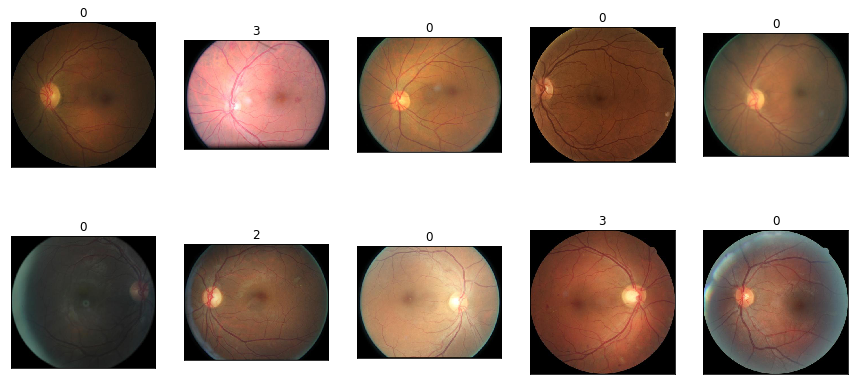

In [86]:
crop_black_image = []
for i, img in enumerate(image):  
    mask = gray_img[i] > 7
    check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
    if (check_shape == 0): 
        pass
    else:
        img1 = img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
        img2 = img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
        img3 = img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
        img  = np.stack([img1, img2, img3], axis = -1)
        crop_black_image.append(img)
    
fig = plt.figure(figsize = (15, 7))
for i in range(len(label)):
    ax = fig.add_subplot(2, len(label)/2, i + 1, xticks = [], yticks = [])     
    plt.imshow(crop_black_image[i])
    ax.set_title(label[i])

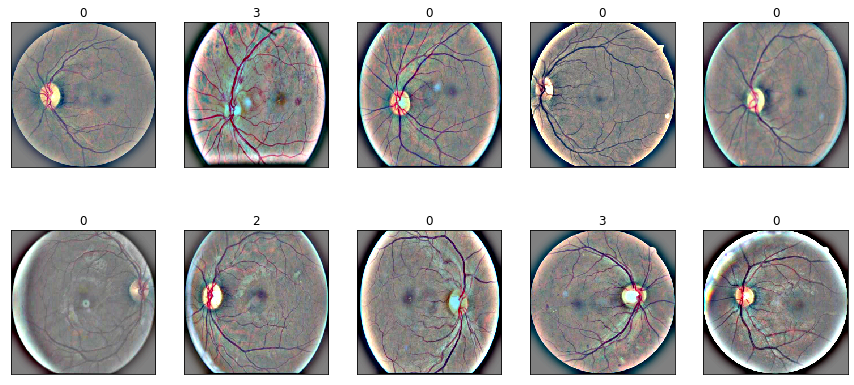

In [104]:
resize_img = []
sigmaX = 10
for img in crop_black_image:
    img = cv2.resize(img, (int(image_size), int(image_size)))
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), sigmaX), -4, 128)
    resize_img.append(img)
    
    
fig = plt.figure(figsize = (15, 7))
for i in range(len(label)):
    ax = fig.add_subplot(2, len(label)/2, i + 1, xticks = [], yticks = [])     
    plt.imshow(resize_img[i])
    ax.set_title(label[i])

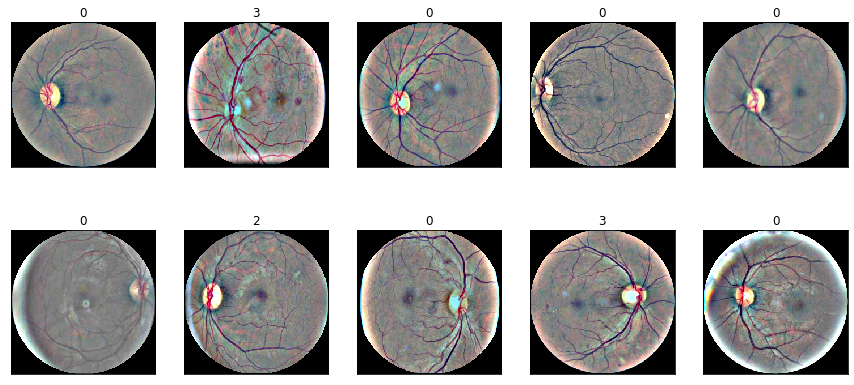

In [105]:
def circle_crop(img, sigmaX = 10):   
        
    height, width, depth = img.shape
    
    largest_side = np.max((height, width))
    img = cv2.resize(img, (largest_side, largest_side))

    height, width, depth = img.shape
    
    x = int(width / 2)
    y = int(height / 2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness = -1)
    
    img = cv2.bitwise_and(img, img, mask = circle_img)
    return img 

circle_img = []
for img in resize_img:
    circle_img.append(circle_crop(img))

fig = plt.figure(figsize = (15, 7))
for i in range(len(label)):
    ax = fig.add_subplot(2, len(label)/2, i + 1, xticks = [], yticks = [])     
    plt.imshow(circle_img[i])
    ax.set_title(label[i])